Sabrina Araújo nUSP 12566182

Exercício 2: processos de discretização de sinais, amostragem e quantização

In [48]:
import numpy as np
import matplotlib.pyplot as plt

Caso 1D

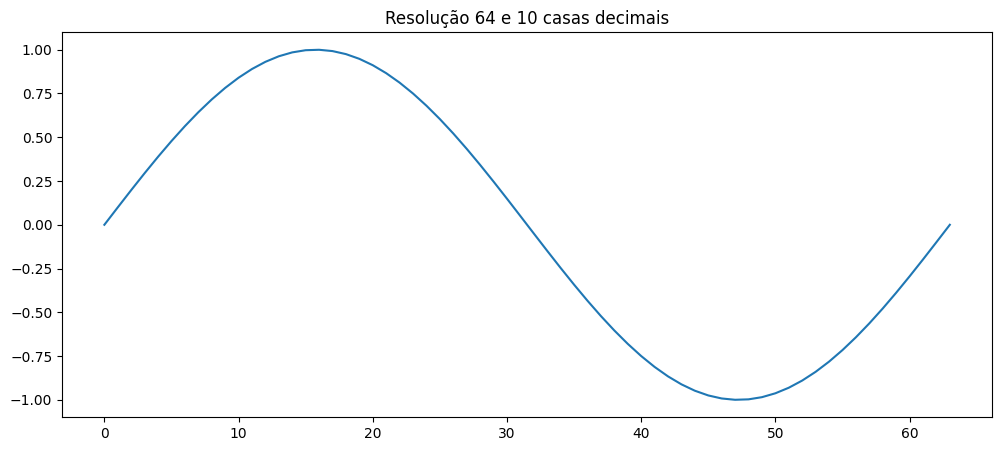

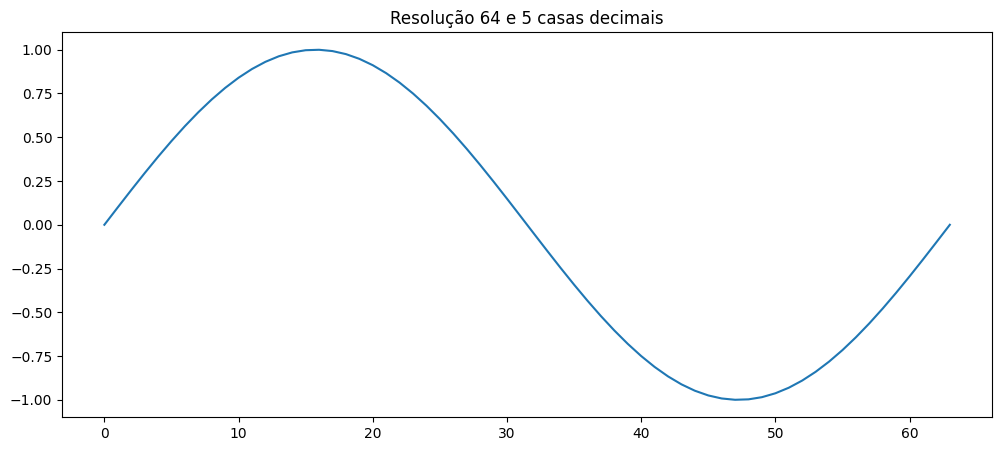

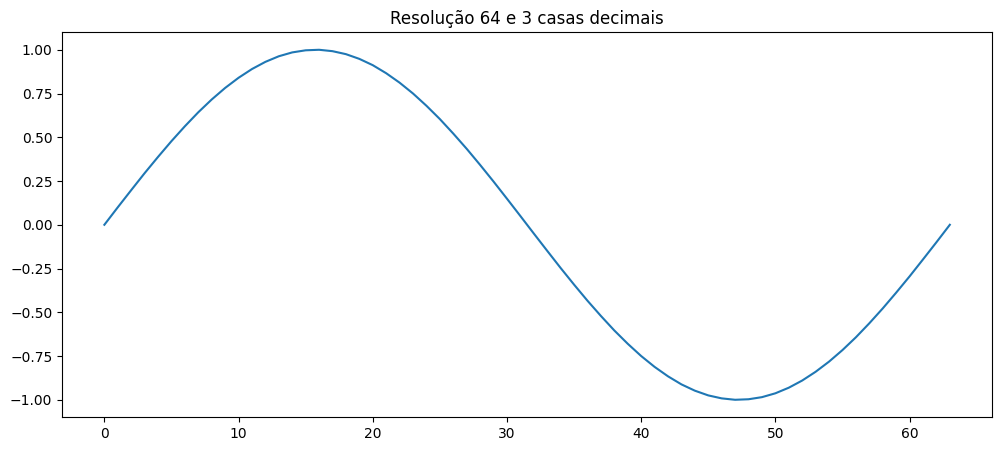

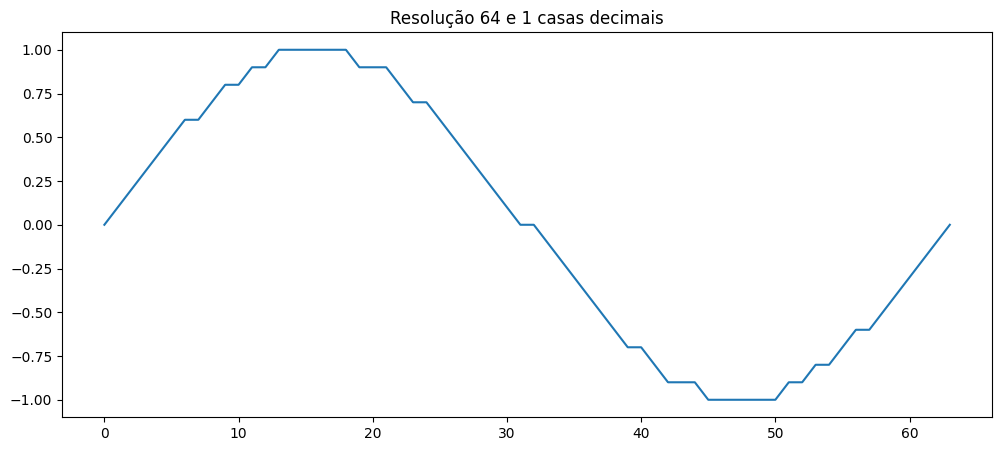

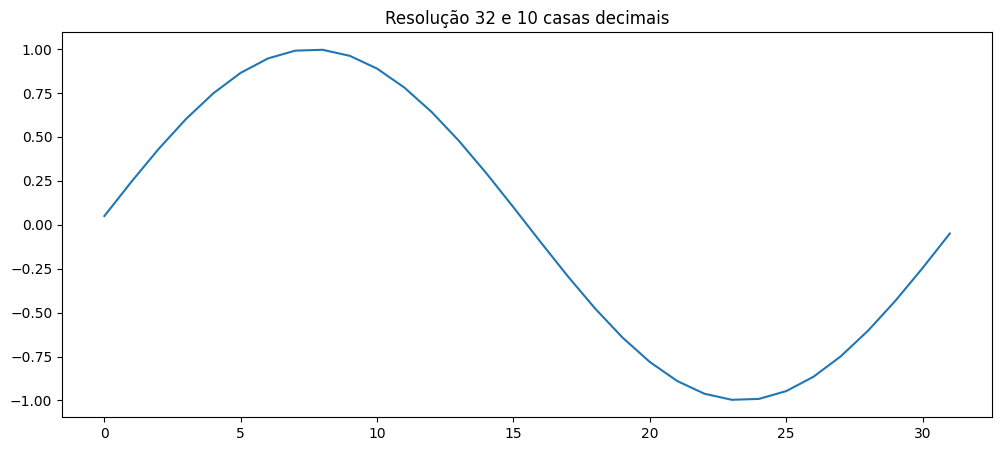

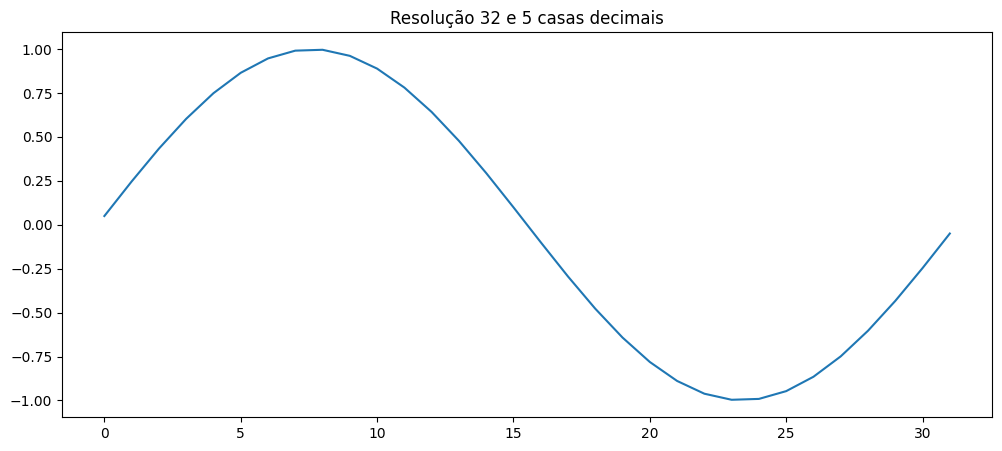

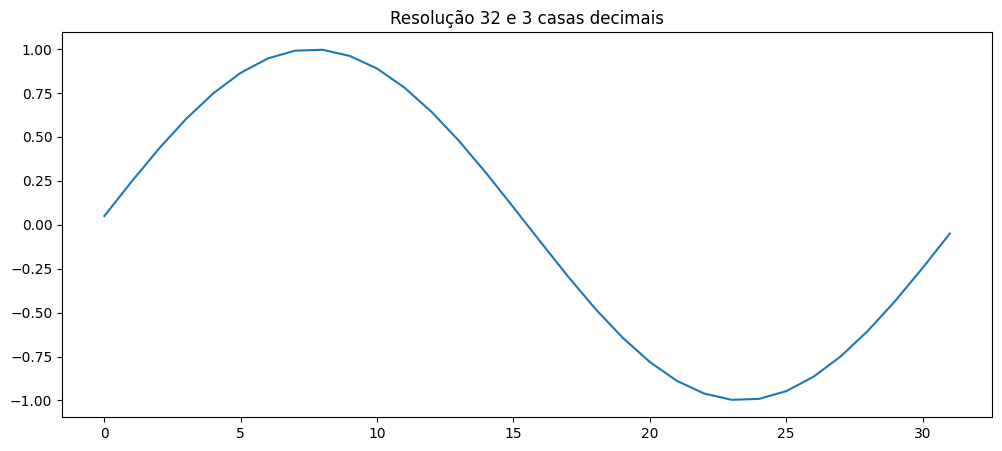

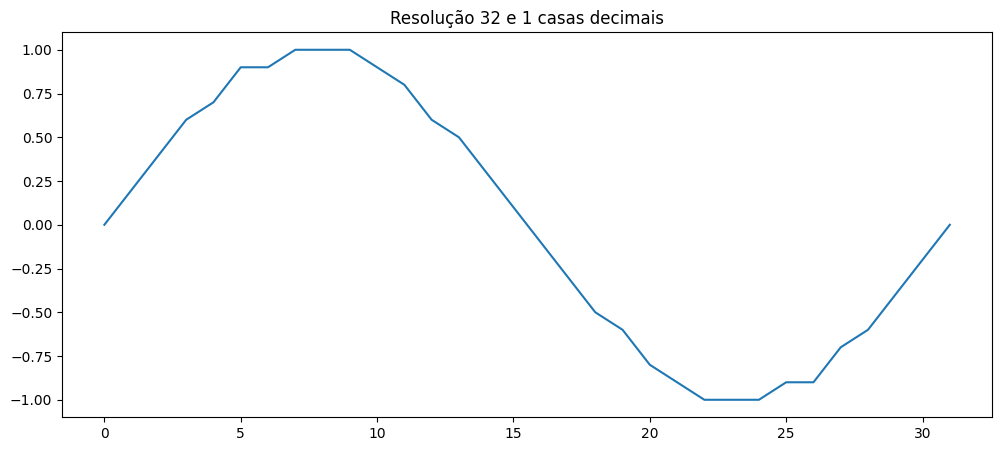

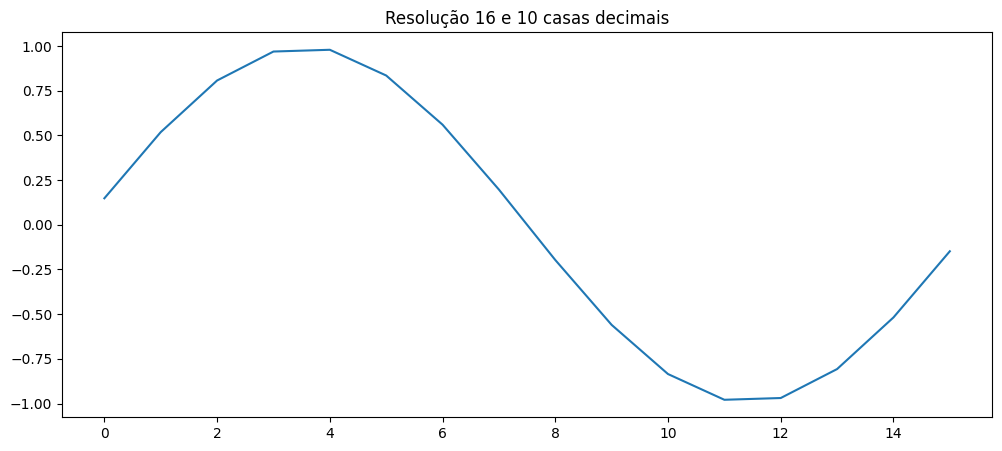

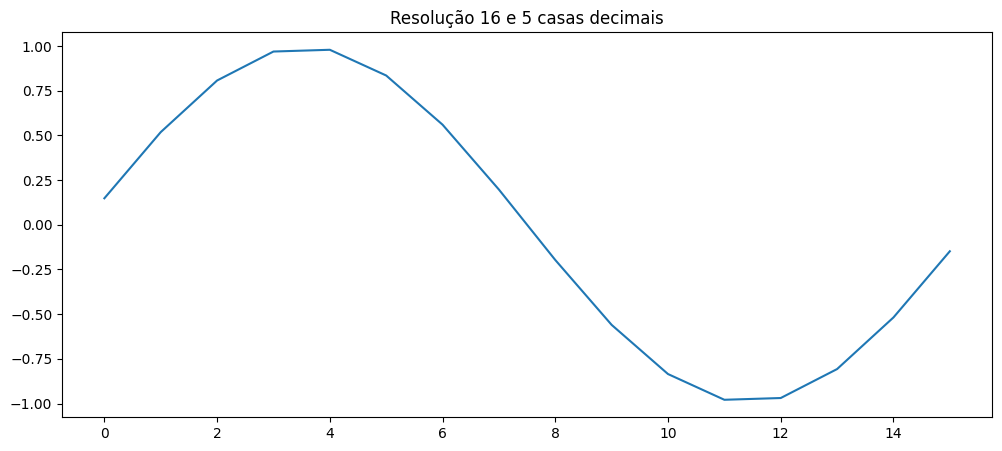

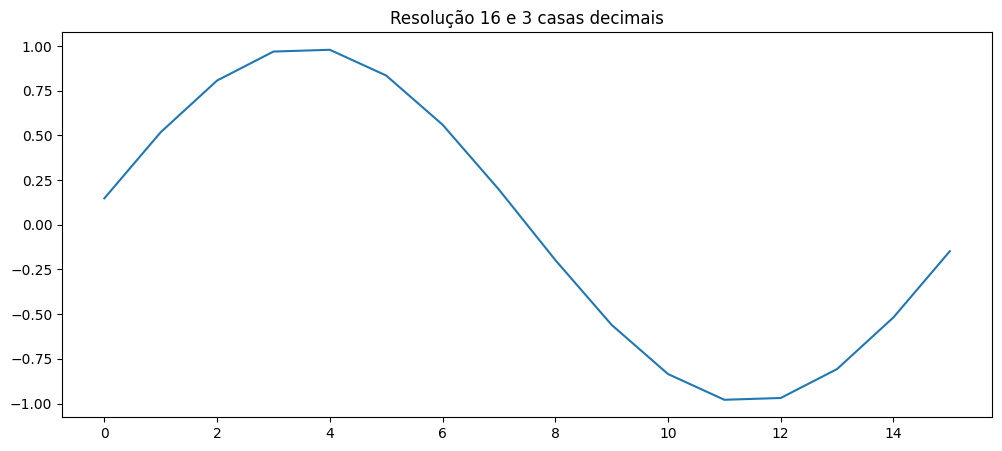

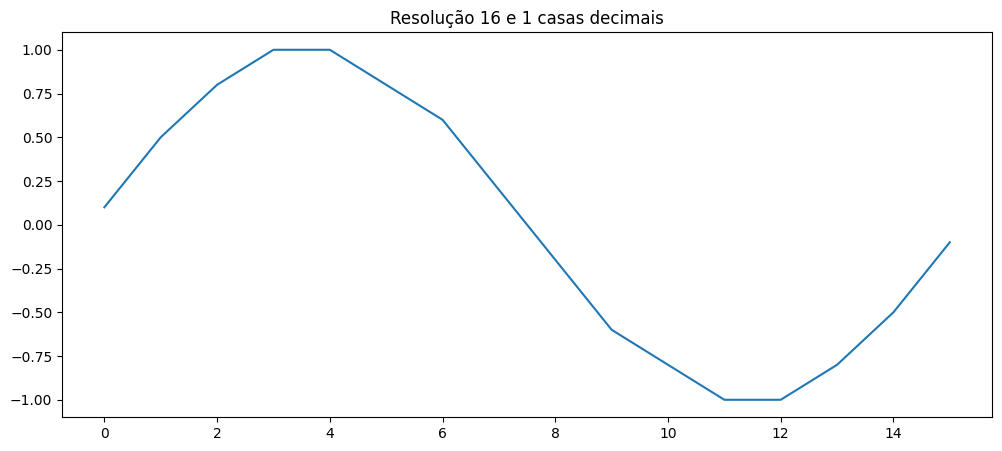

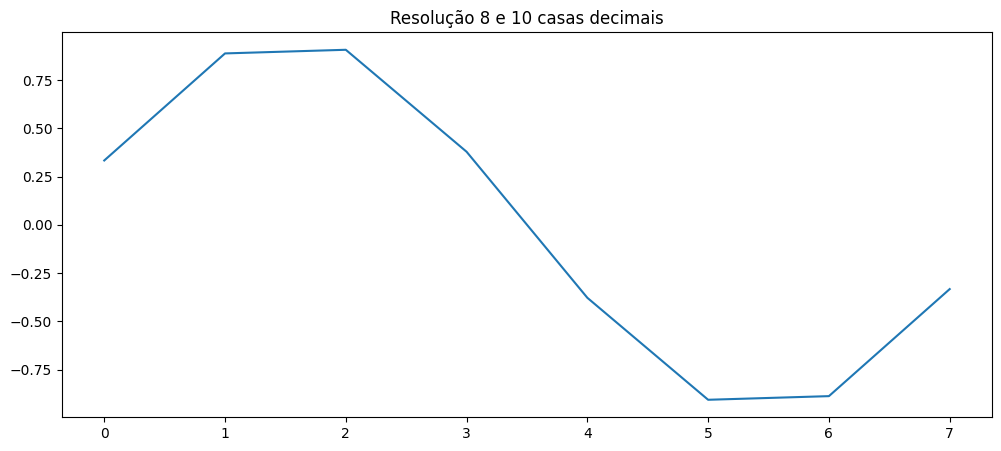

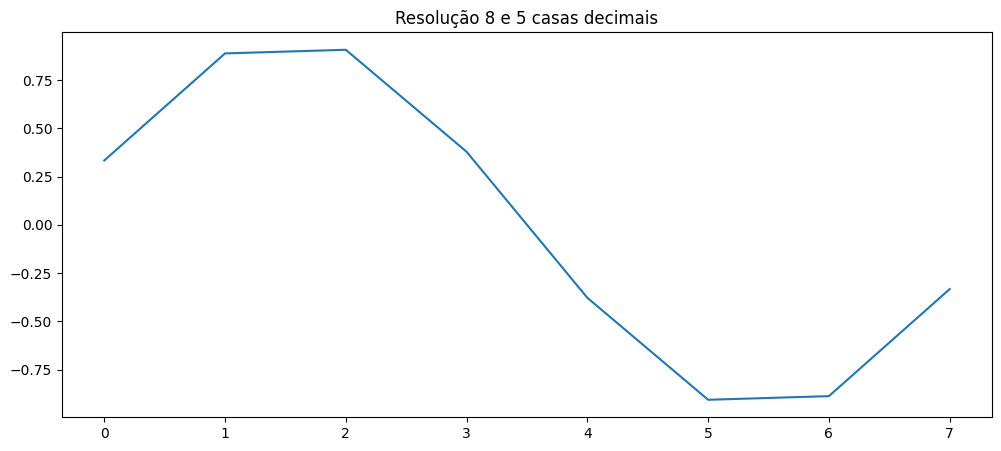

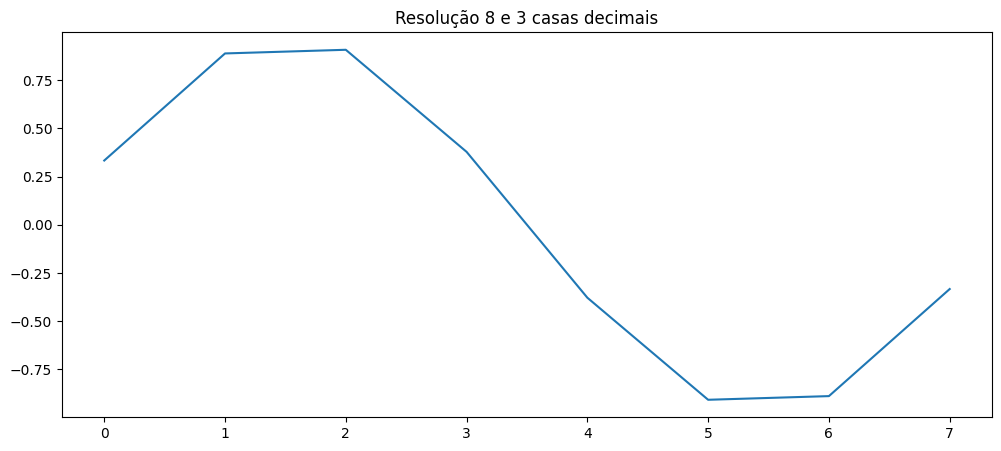

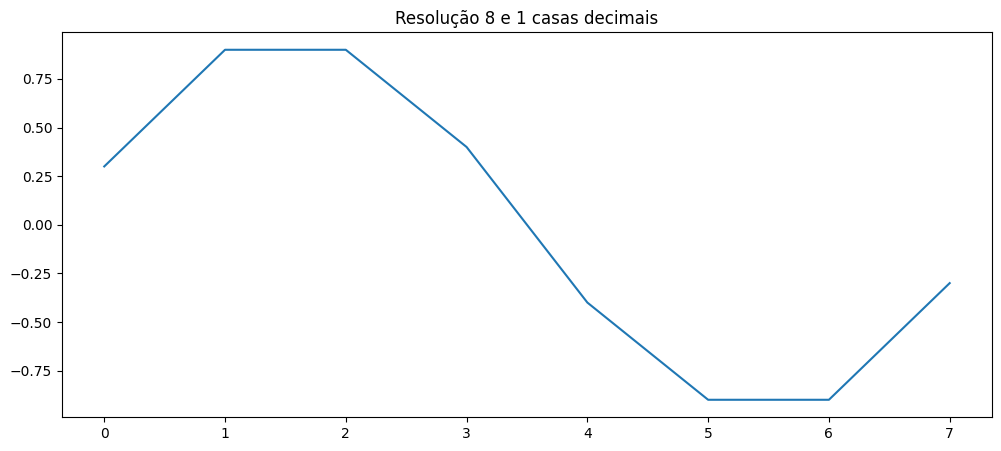

In [50]:
def geraSinal(N, w):
    t = np.linspace(0, 2*np.pi, N)
    sinal = np.sin(w*t)
    return sinal

def amostragem(sinal, N, resolucoes):
    amostragens = []
    for resolucao in resolucoes:
        passo = N // resolucao
        amostra = []
        for i in range(0, N, passo):
            media = np.mean(sinal[i:i+passo])
            amostra.append(media)
        amostragens.append(amostra)
    return amostragens

def quantizacao(sinal, casa_decimal):
    sinal_quantizado = np.round(sinal, casa_decimal)
    return sinal_quantizado

N = 64
w = 1.0

resolucoes = [N, N//2, N//4, N//8]
casas_decimais = [10, 5, 3, 1]

sinal = geraSinal(N, w)

amostragens = amostragem(sinal, N, resolucoes)

for amostra, resolucao in zip(amostragens, resolucoes):
  for casa in casas_decimais:
    resultado = quantizacao(amostra, casa)
    plt.figure(figsize=(12, 5))
    plt.plot(resultado)
    plt.title(f"Resolução {resolucao} e {casa} casas decimais")
    plt.show()





Caso 2D

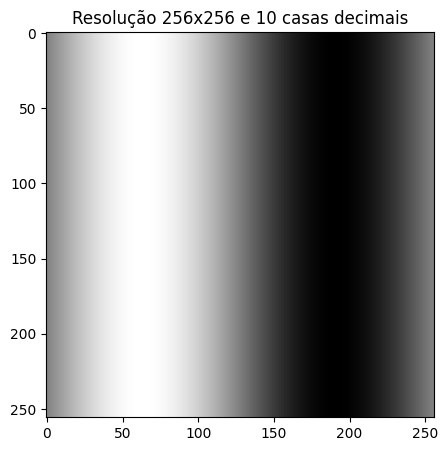

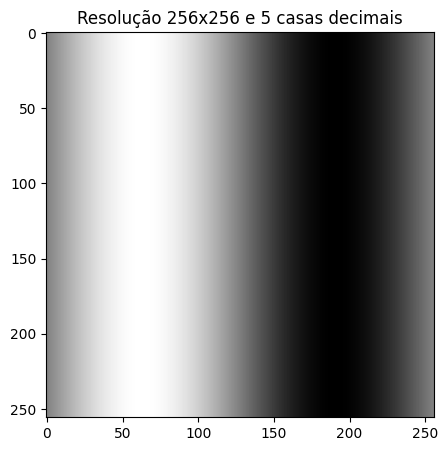

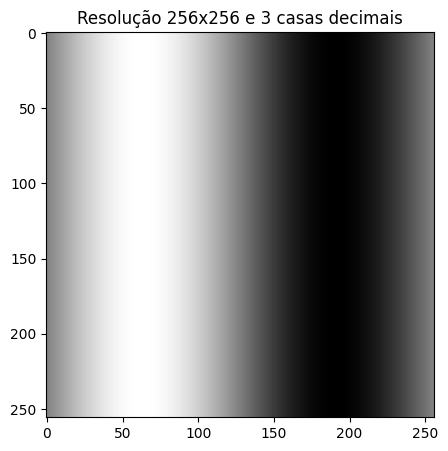

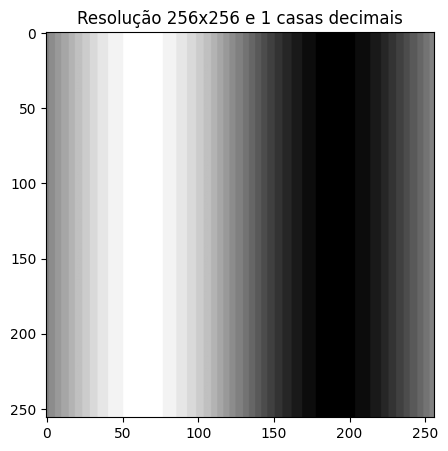

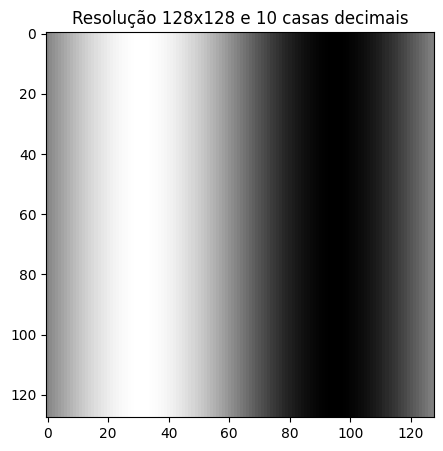

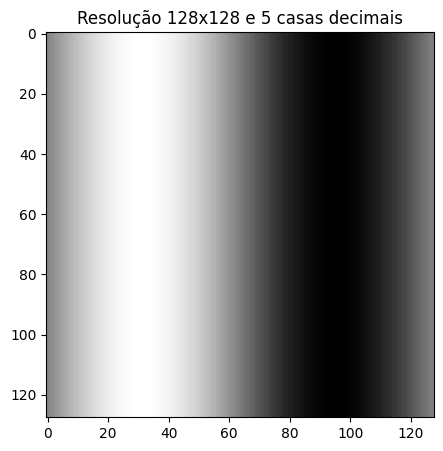

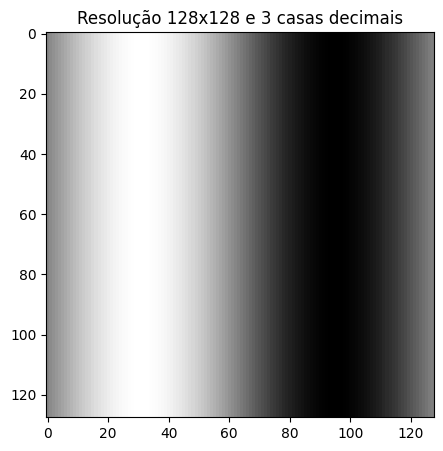

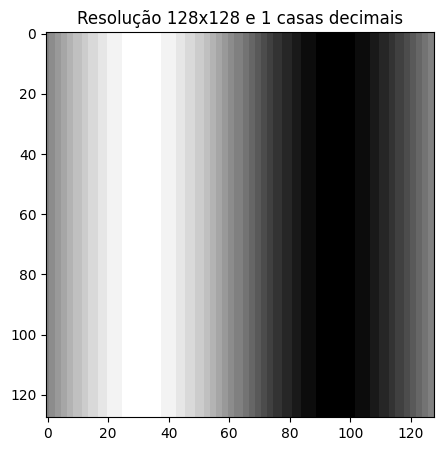

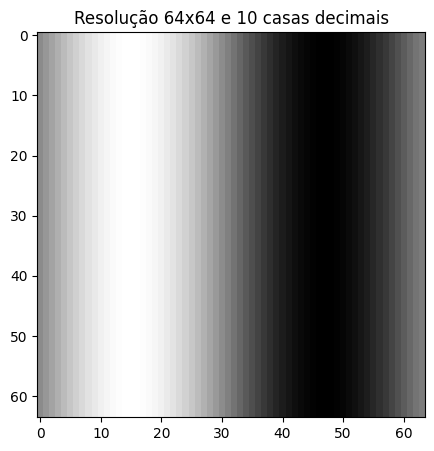

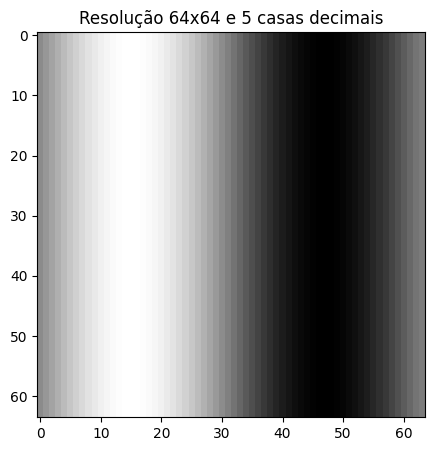

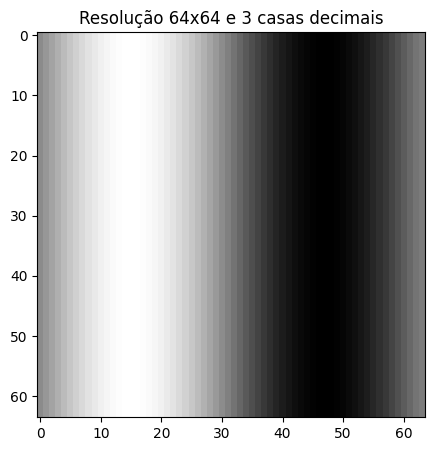

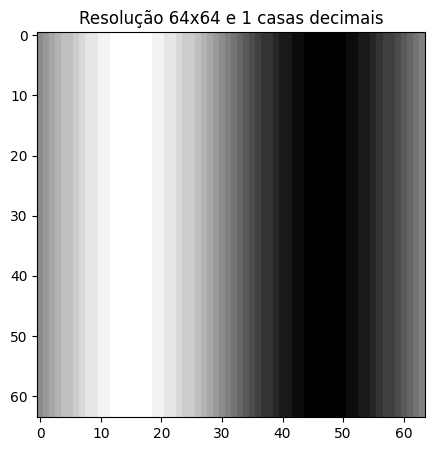

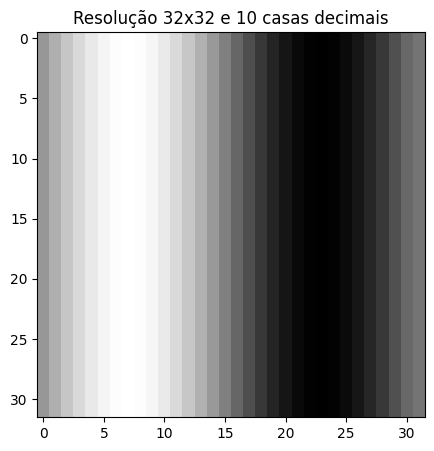

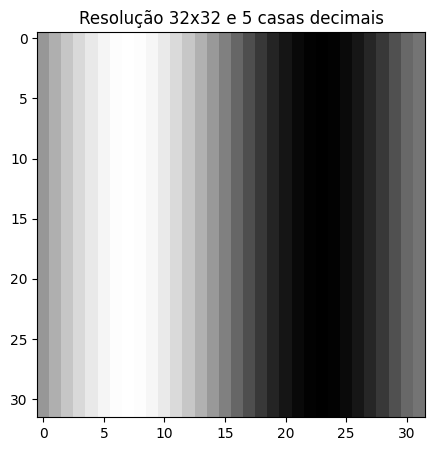

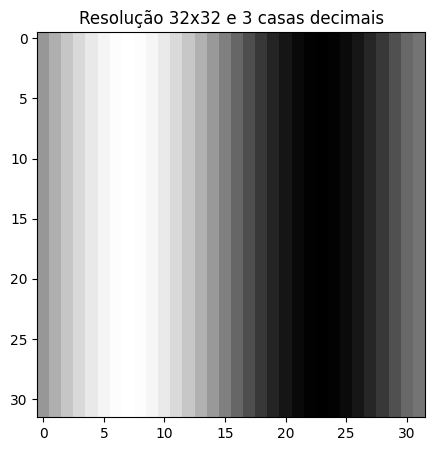

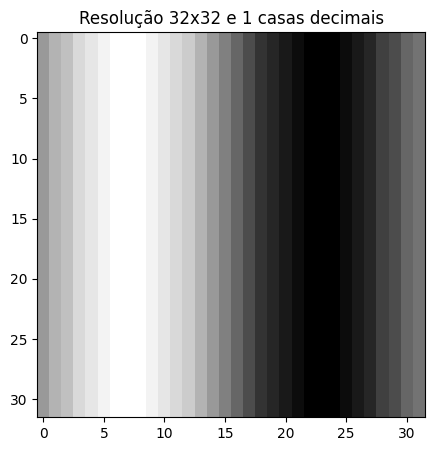

In [53]:
def geraSinal(N, w):
    t = np.linspace(0, 2 * np.pi, N)
    senoides = np.sin(w * t)
    sinal = np.tile(senoides, (N, 1))
    return sinal

def amostragem(sinal, resolucoes, N):
    amostragens = []
    for resolucao in resolucoes:
        passo = N // resolucao
        amostra = []
        for i in range(0, N, passo):
            for j in range(0, N, passo):
                vizinhos = [
                    sinal[i:i+passo, j:j+passo],
                    sinal[i:i+passo, j+passo:j+2*passo],
                    sinal[i+passo:i+2*passo, j:j+passo],
                    sinal[i+passo:i+2*passo, j+passo:j+2*passo]
                ]
                mediaVizinhos = []
                for matriz in vizinhos:
                    if matriz.size > 0:
                        mediaVizinhos.append(matriz)
                if len(mediaVizinhos) > 0:
                    media = np.mean(mediaVizinhos)
                    amostra.append(media)
        amostragens.append(amostra)
    return amostragens

def quantizacao(sinal, casa_decimal):
    sinal_quantizado = np.round(sinal, casa_decimal)
    return sinal_quantizado

N = 256
w = 1.0

resolucoes = [N, N//2, N//4, N//8]
casas_decimais = [10, 5, 3, 1]

sinal = geraSinal(N, w)

amostragens = amostragem(sinal, resolucoes, N)

for amostra, resolucao in zip(amostragens, resolucoes):
    for casa in casas_decimais:
        resultado = quantizacao(amostra, casa)
        resultado_2D = np.array(resultado).reshape(resolucao, resolucao)
        plt.figure(figsize=(5, 5))
        plt.imshow(resultado_2D, cmap='gray', aspect='auto')
        plt.title(f"Resolução {resolucao}x{resolucao} e {casa} casas decimais")
        plt.show()


Imagens do Scikit

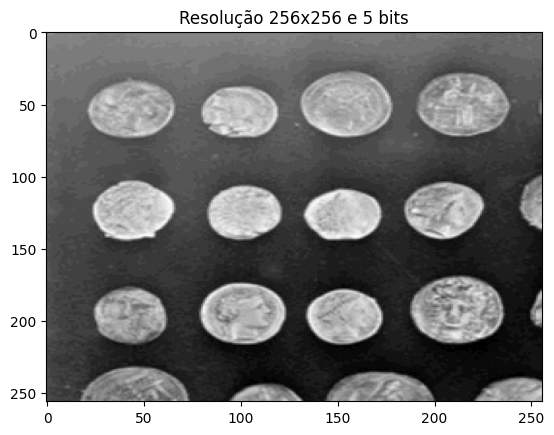

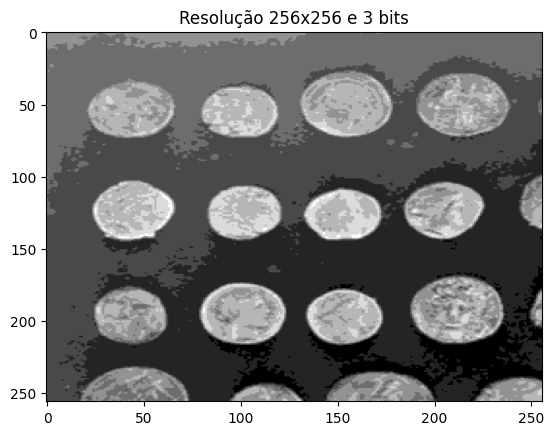

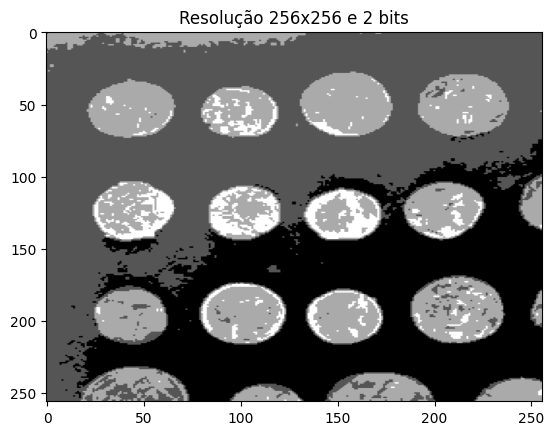

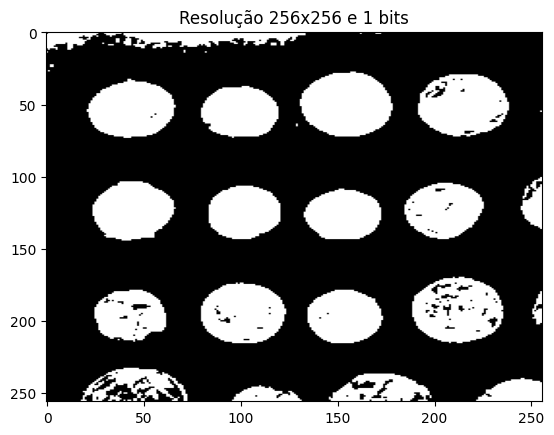

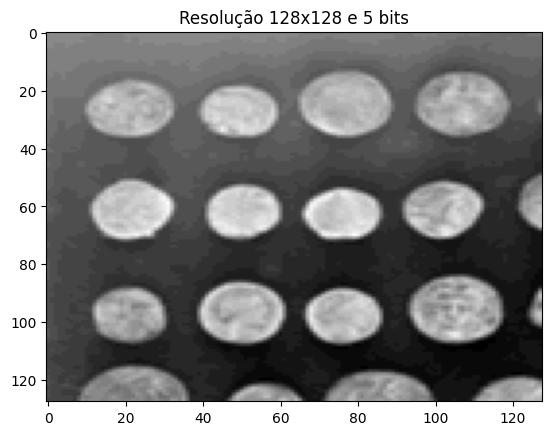

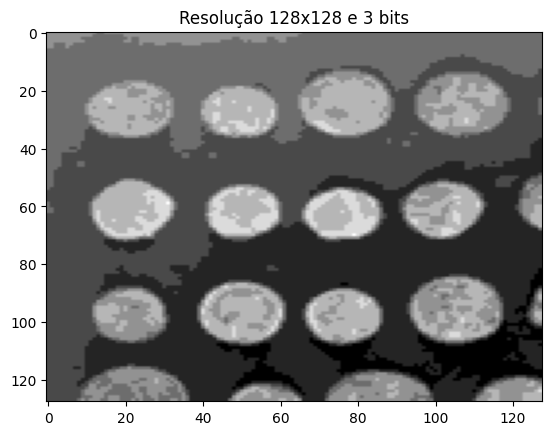

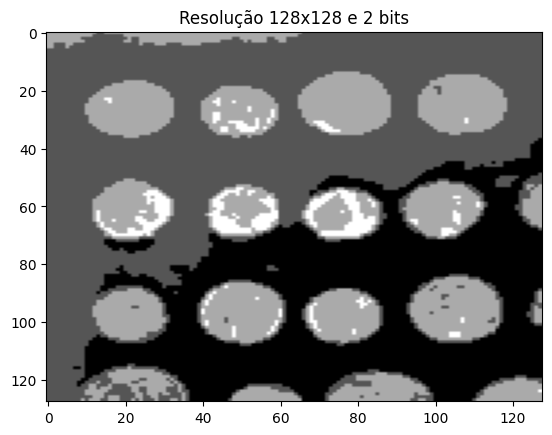

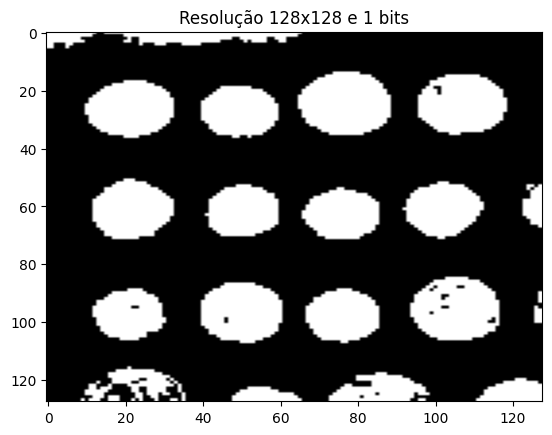

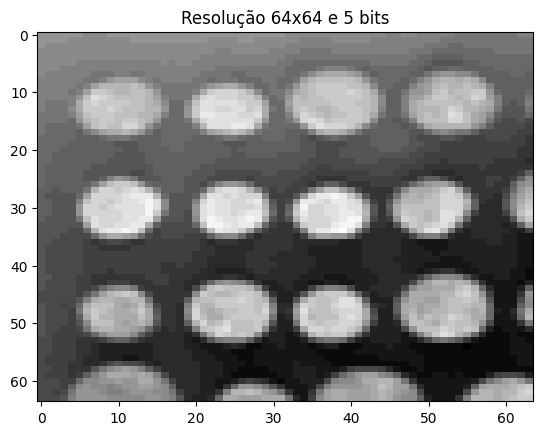

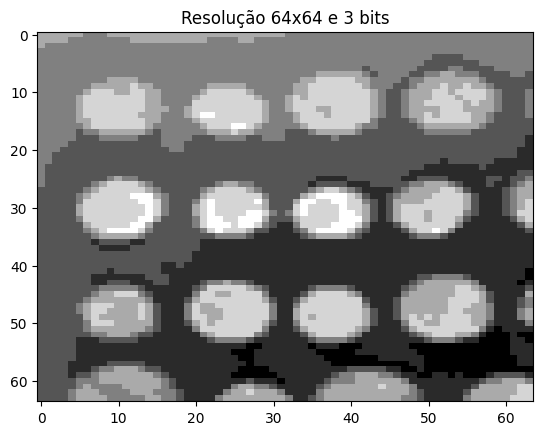

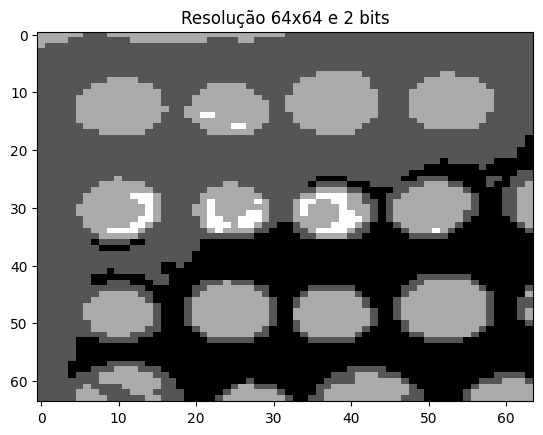

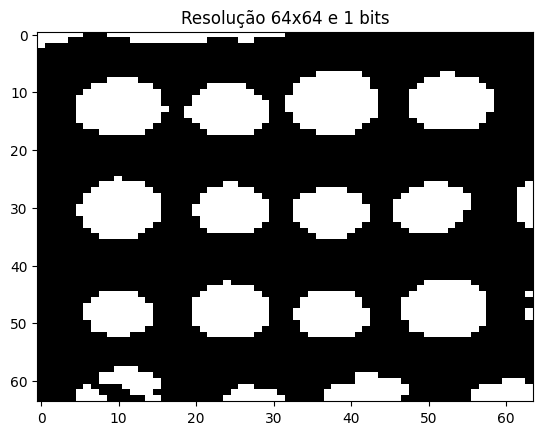

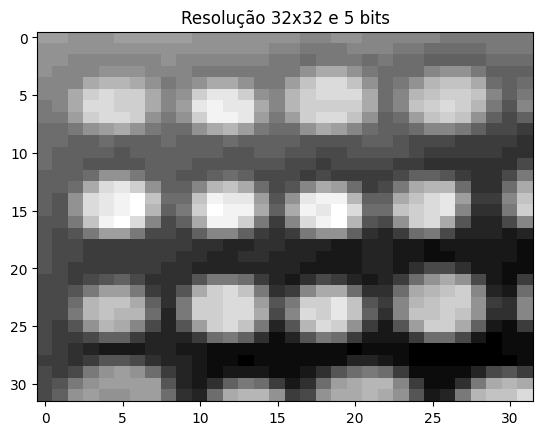

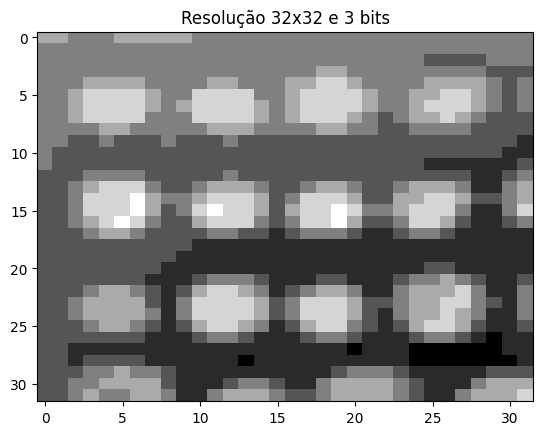

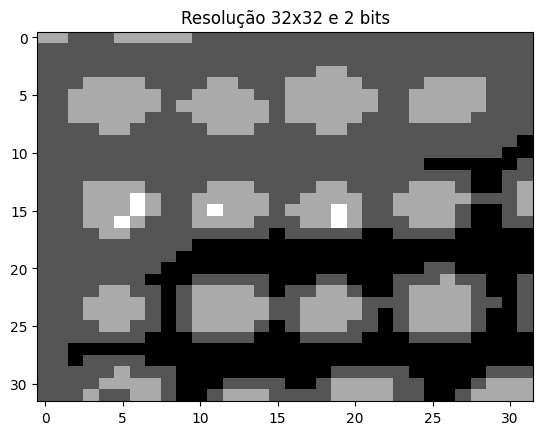

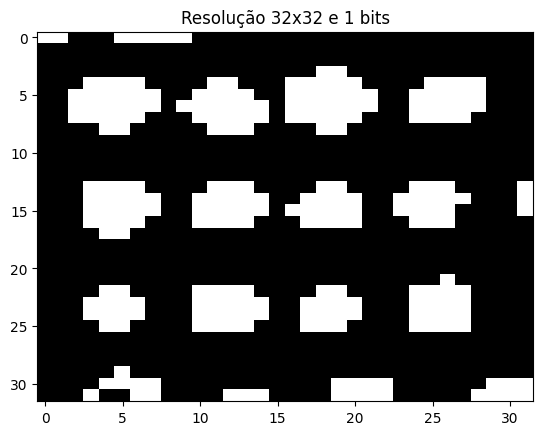

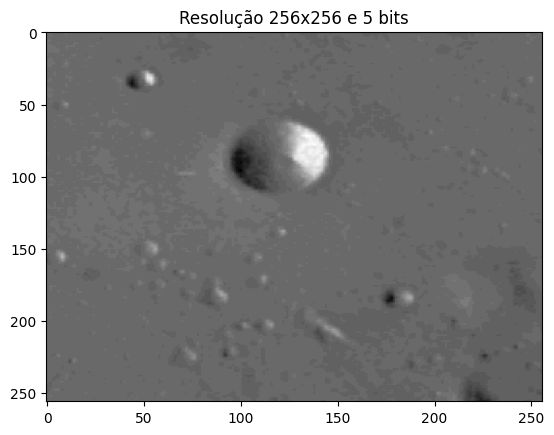

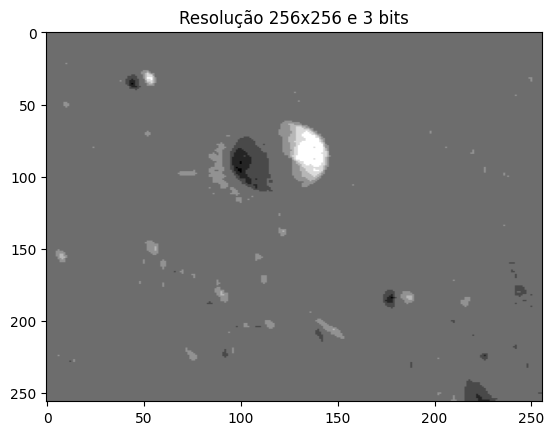

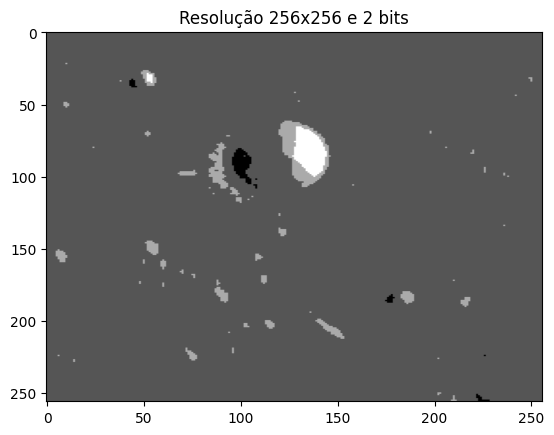

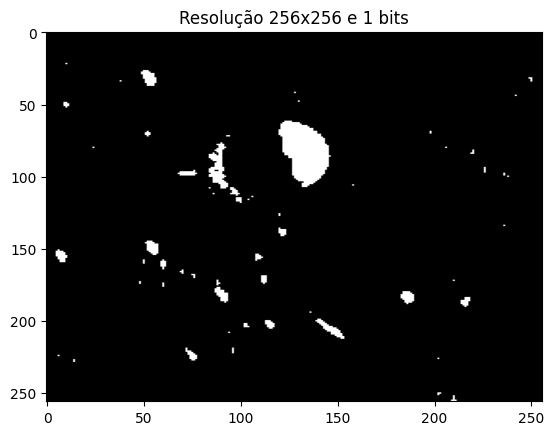

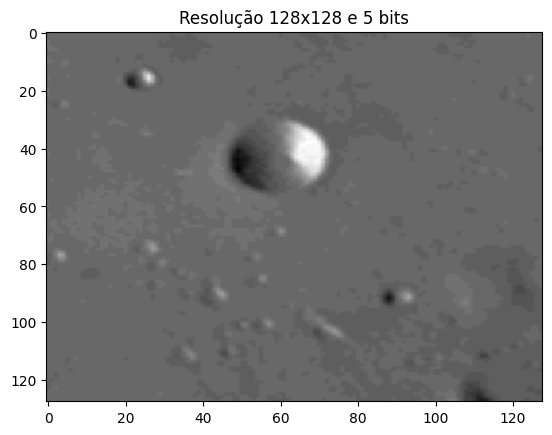

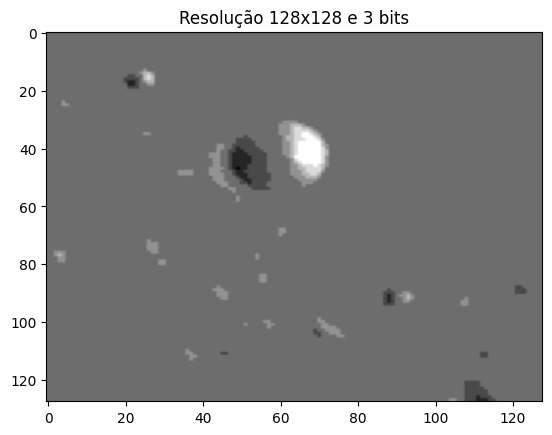

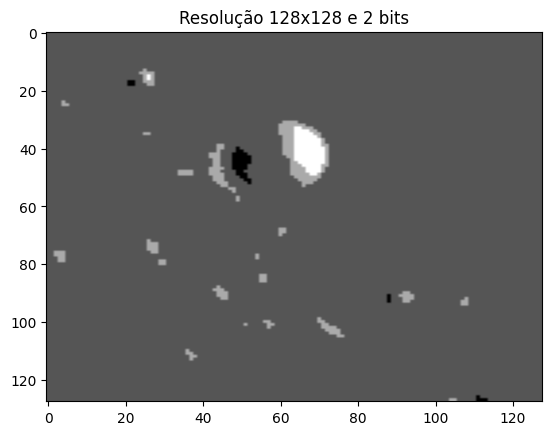

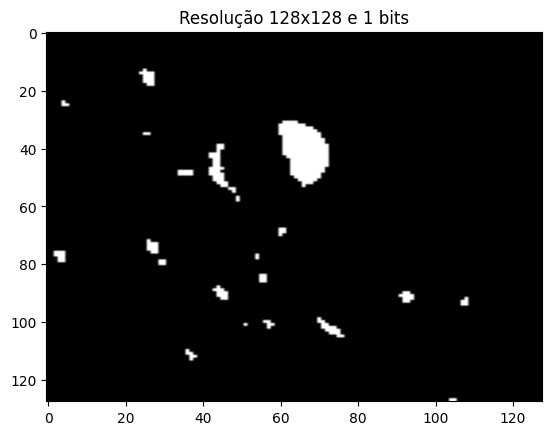

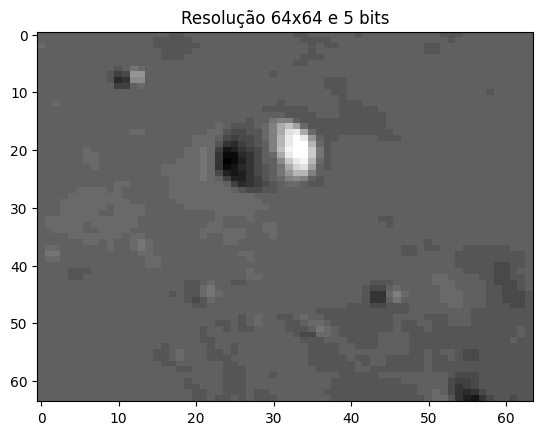

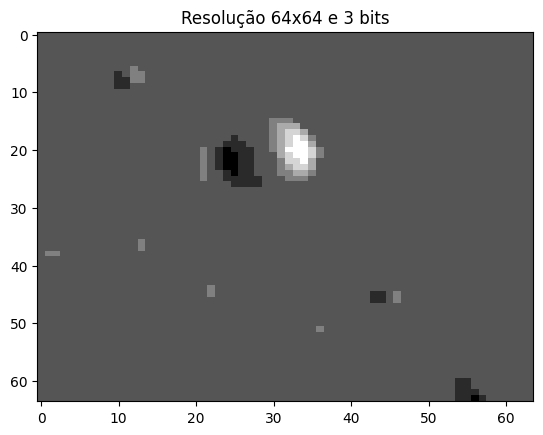

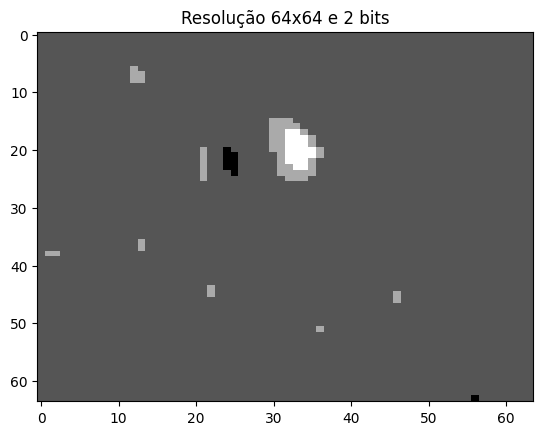

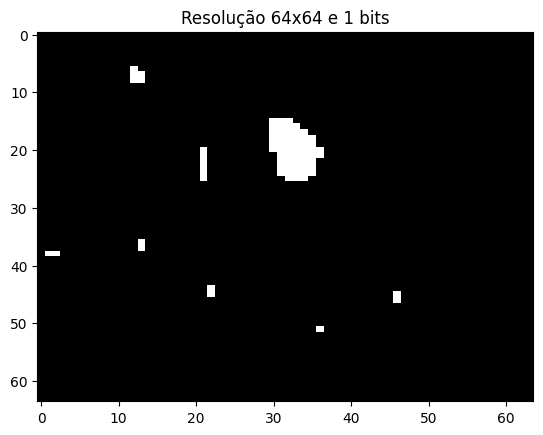

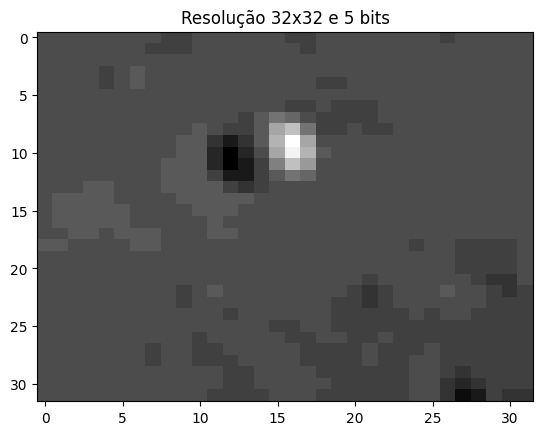

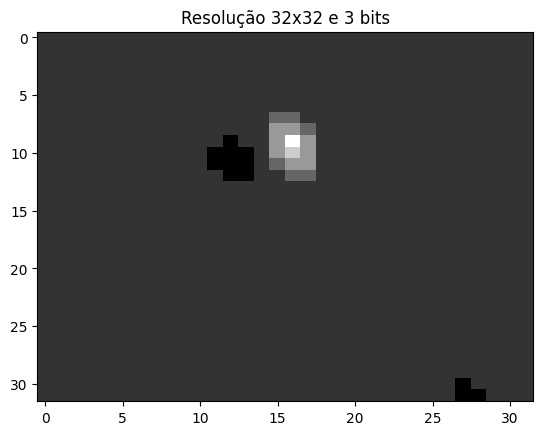

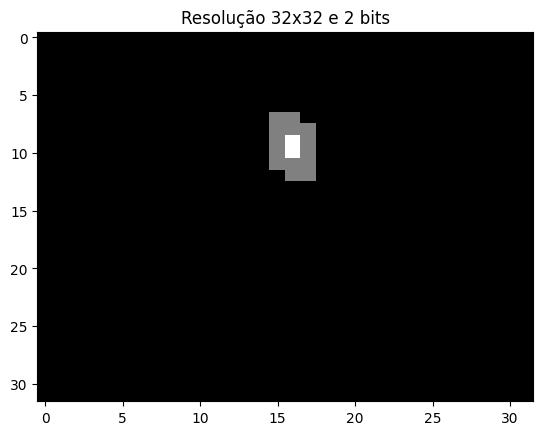

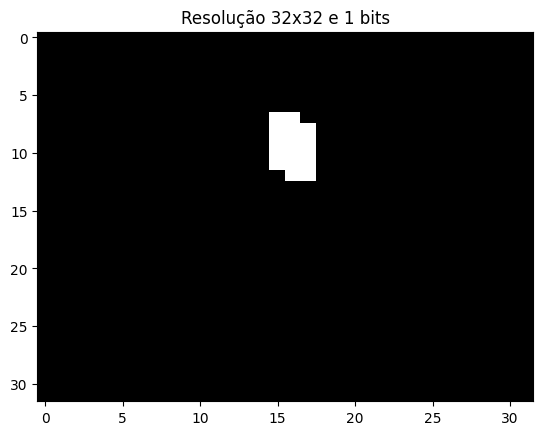

In [66]:
from skimage import data

def geraSinal(N, w):
    t = np.linspace(0, 2 * np.pi, N)
    senoides = np.sin(w * t)
    sinal = np.tile(senoides, (N, 1))
    return sinal

def amostragem(sinal, resolucoes, N):
    amostragens = []
    for resolucao in resolucoes:
        passo = N // resolucao
        amostra = []
        for i in range(0, N, passo):
            for j in range(0, N, passo):
                vizinhos = [
                    sinal[i:i+passo, j:j+passo],
                    sinal[i:i+passo, j+passo:j+2*passo],
                    sinal[i+passo:i+2*passo, j:j+passo],
                    sinal[i+passo:i+2*passo, j+passo:j+2*passo]
                ]
                mediaVizinhos = []
                for matriz in vizinhos:
                    if matriz.size > 0:
                        mediaVizinhos.append(matriz)
                if len(mediaVizinhos) > 0:
                    media = np.mean(mediaVizinhos)
                    amostra.append(media)
        amostragens.append(amostra)
    return amostragens

def quantizacao(sinal, bit):
    sinalBit = np.clip(sinal, 0, 255)
    sinal_quantizado = np.floor(sinalBit / (256 / (2 ** bit))) * (256 // (2 ** bit))
    return sinal_quantizado.astype(np.uint8)

N = 256
w = 1.0

resolucoes = [N, N//2, N//4, N//8]
bits = [5, 3, 2, 1]

imagem = data.coins()

amostragens = amostragem(imagem, resolucoes, N)

for amostra, resolucao in zip(amostragens, resolucoes):
    for bit in bits:
        resultado = quantizacao(amostra, bit)
        resultado_2D = np.array(resultado).reshape(resolucao, resolucao)
        plt.figure()
        plt.imshow(resultado_2D, cmap='gray', aspect='auto')
        plt.title(f"Resolução {resolucao}x{resolucao} e {bit} bits")
        plt.show()

imagem = data.moon()

amostragens = amostragem(imagem, resolucoes, N)

for amostra, resolucao in zip(amostragens, resolucoes):
    for bit in bits:
        resultado = quantizacao(amostra, bit)
        resultado_2D = np.array(resultado).reshape(resolucao, resolucao)
        plt.figure()
        plt.imshow(resultado_2D, cmap='gray', aspect='auto')
        plt.title(f"Resolução {resolucao}x{resolucao} e {bit} bits")
        plt.show()
